## I. Write a basic implementation of Lloyd’s algorithm for a large set of data in R$^d$ (i.e., to ﬁnd a Voronoi partition and a set of K centroids). Your algorithm should attempt to solve the classic K-means problem, for any user-selected positive integer value K.
- Assume the input data is given to you in a matrix X ∈ R(N×d), where each row in X corresponds to an observation of a d-dimensional point. That is, your inputs will be a user-provided matrix X and the number of clusters K.

- Your outputs should be (i) a matrix Y ∈ R K×d , where row j contains the centroid of the j th partition; (ii) a cluster index vector C ∈ {1, 2, . . . K} N , where C(i) = j indicates that the i th row of X (or the i th observation x i ) belongs to cluster j; and (iii) the ﬁnal objective function value, i.e., the best distortion, or averaged distance value, D obtained.

- Convergence may be based on a norm-based comparison of the iterates of Y , i.e., kY p+1 −Y p k < tol, OR on a norm-based comparison of the distortion achieved kD p+1 − D p k < tol. Choose tol to be (1) 1 × 10 −5 , and (2) a diﬀerent value of your choice, with your reasoning provided.

In [32]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

### Load dataset and visualize

In [33]:
with open('/Users/macbookpro/Desktop/IE529_Comp2/Dataset_1/clustering.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    x = list(reader)
    data_1 = np.array(x).astype("float")
    
with open('/Users/macbookpro/Desktop/IE529_Comp2/Dataset_2/ShapedData.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    x = list(reader)
    data_2 = np.array(x).astype("float")

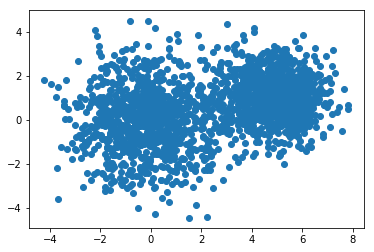

In [3]:
plt.scatter(data_1[:,0],data_1[:,1])
plt.show()

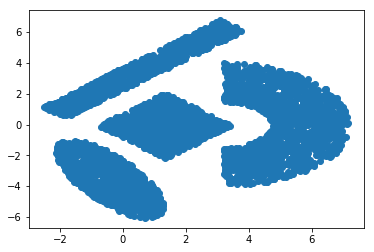

In [4]:
plt.scatter(data_2[:,0],data_2[:,1])
plt.show()

#### define the function that initialize the centroids

In [50]:
# farthest point init centroids

def centroids_init(matrix, K):
    index = [np.random.randint(low=0, high=len(matrix[:,0]))]
    for count in range(1,K):
        for p_index in index:
            x, y = matrix[p_index]
            s = np.array([[0, 0]])
            for num in range(len(matrix[:,0])):
                if num != p_index:
                    distance = math.sqrt((x - matrix[num][0])**2 + (x - matrix[num][1])**2)
                    t = np.array([[distance, num]])
                    s = np.concatenate((s, t), axis=0)
            s = s[np.argsort(s[:, 0])]
        index.append(int(s[-1][1]))
    centroids = matrix[index]
    return centroids


# # Randomly initialize centroids

# def centroids_init(matrix, K):
#     index = np.random.randint(low=0, high=len(matrix[:,0]), size=K)
#     centroids = matrix[index]
#     return centroids

In [51]:
def find_closest_centroids(matrix, centroids):
    # Set m
    m = centroids.shape[0]
    
    # initialize distance matrix
    distance = np.zeros((matrix.shape[0], m))

    for i in range(matrix.shape[0]):
        for j in range(m):
            distance[i][j] = math.sqrt((centroids[j][0] - matrix[i][0])**2 + (centroids[j][1] - matrix[i][1])**2)
#             distance[i,:] = np.array([j, math.sqrt((centroids[j,:] - matrix[i,:]).dot(centroids[j,:] - matrix[i,:]))])
    idx = np.argmin(distance, axis=1)
#     new_centroids = centroids[idx]
    return idx

In [52]:
def compute_centroids(matrix, idx, K):
    centroid_x = sum(matrix[np.where(idx == 0)][:,0])/len(matrix[np.where(idx == 0)])
    centroid_y = sum(matrix[np.where(idx == 0)][:,1])/len(matrix[np.where(idx == 0)])
    centroids = np.array([[centroid_x, centroid_y]])
    for i in range(1, K):
        index = matrix[np.where(idx == i)]
        centroid_x, centroid_y = sum(index[:,0])/len(index), sum(index[:,1])/len(index)
        centroids = np.concatenate((centroids, np.array([[centroid_x, centroid_y]])))
    return centroids

In [53]:
def compute_distortion(matrix, idx, centroids, K):
    distance = []
    for i in range(K):
        group = matrix[np.where(idx == i)]
        for j in range(group.shape[0]):
            distance.append(math.sqrt((centroids[i][0] - group[j][0])**2 + (centroids[i][1] - group[j][1])**2))
    distortion = sum(distance)
    return distortion

#### Experiment on dataset 1

In [54]:
# parameters initialization
K = 2
data = data_1
max_iter = 300
val = [0.0001, 10**(-5)]

In [55]:
# val = 10**-5

centroids = centroids_init(data, K)

for _ in range(max_iter):
    idx = find_closest_centroids(data, centroids)
    new_centroids = compute_centroids(data, idx, K)
    d = compute_distortion(data, idx, centroids, K)
    d_new = compute_distortion(data, idx, new_centroids, K)
    if abs(d_new - d) < val[1]:
        break
    else:
        centroids = new_centroids
        new_centroids = compute_centroids(data, idx, K)

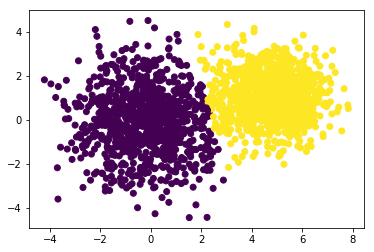

In [57]:
plt.scatter(data[:,0],data[:,1], c=idx)
plt.show()

In [12]:
# Centroids for this dataset
Y = centroids
Y

array([[ 4.80833513,  1.05385739],
       [-0.2159331 , -0.0629825 ]])

In [13]:
# Distortion
D = d_new
D

3049.223071649427

In [14]:
# cluster index vector
C = idx
C

array([1, 1, 1, ..., 0, 0, 0])

In [15]:
# val = 0.0001

centroids = centroids_init(data, K)

for _ in range(max_iter):
    idx = find_closest_centroids(data, centroids)
    new_centroids = compute_centroids(data, idx, K)
    d = compute_distortion(data, idx, centroids, K)
    d_new = compute_distortion(data, idx, new_centroids, K)
    if abs(d_new - d) < val[0]:
        break
    else:
        centroids = new_centroids
        new_centroids = compute_centroids(data, idx, K)

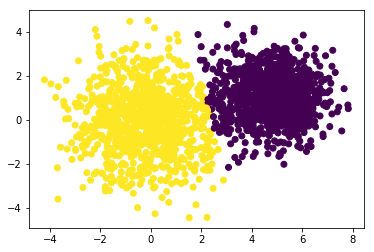

In [16]:
plt.scatter(data[:,0],data[:,1], c=idx)
plt.show()

In [17]:
# Centroids for this dataset
Y = centroids
Y

array([[ 4.80833513,  1.05385739],
       [-0.2159331 , -0.0629825 ]])

In [18]:
# Distortion
D = d_new
D

3049.223071649427

In [19]:
# cluster index vector
C = idx
C

array([1, 1, 1, ..., 0, 0, 0])

#### Experiment on dataset 2

In [20]:
K = 4
data = data_2
max_iter = 300
val = [0.001, 10**-5]

In [21]:
# Randomly initialize centroids

def centroids_init(matrix, K):
    index = np.random.randint(low=0, high=len(matrix[:,0]), size=K)
    centroids = matrix[index]
    return centroids



def compute_centroids(matrix, idx, K):
    centroid_x = sum(matrix[np.where(idx == 0)][:,0])/len(matrix[np.where(idx == 0)])
    centroid_y = sum(matrix[np.where(idx == 0)][:,1])/len(matrix[np.where(idx == 0)])
    centroids = np.array([[centroid_x, centroid_y]])
    for i in range(1, K):
        index = matrix[np.where(idx == i)]
#         print (len(index))
        centroid_x, centroid_y = sum(index[:,0])/len(index), sum(index[:,1])/len(index)
        centroids = np.concatenate((centroids, np.array([[centroid_x, centroid_y]])))
    return centroids

In [22]:
# val = 10**-5

centroids = centroids_init(data, K)

for _ in range(max_iter):
    idx = find_closest_centroids(data, centroids)
    new_centroids = compute_centroids(data, idx, K)
    d = compute_distortion(data, idx, centroids, K)
    d_new = compute_distortion(data, idx, new_centroids, K)
    if abs(d_new - d) < val[1]:
        break
    else:
        centroids = new_centroids
        new_centroids = compute_centroids(data, idx, K)

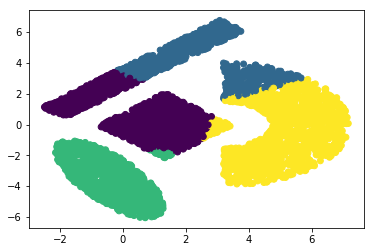

In [23]:
plt.scatter(data[:,0],data[:,1], c=idx)
plt.show()

In [24]:
# Centroids for this dataset
Y = centroids
Y

array([[ 0.55342828,  0.62239439],
       [ 2.50822746,  4.29537602],
       [-0.38157179, -3.48083101],
       [ 5.02221541, -0.49046381]])

In [25]:
# Distortion
D = d_new
D

7337.5390037174175

In [26]:
# cluster index vector
C = idx
C

array([0, 3, 3, ..., 1, 3, 2])

In [27]:
# val = 10**-5

centroids = centroids_init(data, K)

for _ in range(max_iter):
    idx = find_closest_centroids(data, centroids)
    new_centroids = compute_centroids(data, idx, K)
    d = compute_distortion(data, idx, centroids, K)
    d_new = compute_distortion(data, idx, new_centroids, K)
    if abs(d_new - d) < val[0]:
        break
    else:
        centroids = new_centroids
        new_centroids = compute_centroids(data, idx, K)

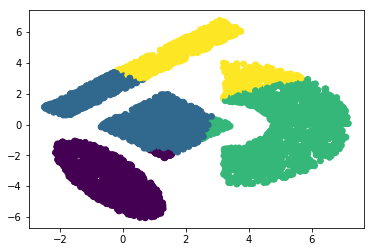

In [28]:
plt.scatter(data[:,0],data[:,1], c=idx)
plt.show()

In [29]:
# Centroids for this dataset
Y = centroids

In [30]:
# Distortion
D = d_new

In [31]:
# cluster index vector
C = idx
C

array([1, 2, 2, ..., 2, 2, 0])